In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [3]:
data =pd.read_csv(r"C:\Users\admin\Downloads\House_price_prediction_dataset\data.csv")
df =pd.DataFrame(data)
df

date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]

In [5]:
df.describe()
#because value of "count" in each column is same so we can say don't have missing value .

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [7]:
print("Number Of Rows is :" ,df.shape[0])
print("Number Of Feature is :" ,df.shape[1])

Number Of Rows is : 4600
Number Of Feature is : 18


In [9]:
dtype =[]
count =[]
unique =[]
missing_value =[]
Name_Feature =[]
Describe=["the date of sale or registration of the property" ,
          "property price","number of bedrooms","the number of bathrooms","living area (square feet)",
          "land area (square feet)","the number of floors","proximity to water","view (from 0 to 4)",
          "property condition (from 1 to 5)","area above ground level (square feet)",
          "basement area (square feet)","year of construction","year of renovation",
          "name of the street","City","state and zip code","Name Country"]
for i in df.columns :
    dtype.append(df[i].dtype)
    Name_Feature.append(i)
    count.append(len(df[i]))
    unique.append(df[i].nunique())
    missing_value.append(df[i].isnull().sum())
    
output =pd.DataFrame({"Name Columns":Name_Feature ,
                      "Describe":Describe ,
                      "Dtype":dtype,
                      "Count":count ,
                      "Unique":unique ,
                      "Missing Value":missing_value})

output

Name Columns                                          Describe    Dtype  \
0            date  the date of sale or registration of the property   object   
1           price                                    property price  float64   
2        bedrooms                                number of bedrooms  float64   
3       bathrooms                           the number of bathrooms  float64   
4     sqft_living                         living area (square feet)    int64   
5        sqft_lot                           land area (square feet)    int64   
6          floors                              the number of floors  float64   
7      waterfront                                proximity to water    int64   
8            view                                view (from 0 to 4)    int64   
9       condition                  property condition (from 1 to 5)    int64   
10     sqft_above             area above ground level (square feet)    int64   
11  sqft_basement                       basement area (square feet)    int64   
12       yr_built                              year of construction    int64   
13   yr_renovated                                year of renovation    int64   
14         street                                name of the street   object   
15           city                                              City   object   
16       statezip                                state and zip code   object   
17        country                                      Name Country   object   

    Count  Unique  Missing Value  
0    4600      70              0  
1    4600    1741              0  
2    4600      10              0  
3    4600      26              0  
4    4600     566              0  
5    4600    3113              0  
6    4600       6              0  
7    4600       2              0  
8    4600       5              0  
9    4600       5              0  
10   4600     511              0  
11   4600     207              0  
12   4600     115              0  
13   4600      60              0  
14   4600    4525              0  
15   4600      44              0  
16   4600      77              0  
17   4600       1              0

In [11]:
#changing name columns :

df.rename(columns ={"sqft_living": "square feet living",
          "sqft_lot": "square feet alotted",
          "sqft_above" :"square feet home" ,
          "sqft_basement":"square feet basement" ,
          "yr_built":"Year Building" ,
          "yr_renovated":"Year Rebuilding"} ,inplace =True)

In [13]:
#we have to change type of floor and bedrooms and bathrooms to :" int "
# floors    column is :float64 and now ----->int32
# bathrooms column is :float64 and now ----->int32
# bedrooms  column is :float64 and now ----->int32


df.loc[:,["floors" , "bedrooms" , "bathrooms"]] =df[["floors" , "bedrooms" , "bathrooms"]].astype("int")

In [15]:
pd.set_option('display.float_format', lambda x: format(x, '.2f'))

In [17]:
# observe the number of rows where the price is 0
count_zero_prices = (df['price'] == 0).sum()
print(f"Number of Zero is : {count_zero_prices}")
df[df["price"] == 0]

Number of Zero is : 49


date  price  bedrooms  bathrooms  square feet living  \
4354  2014-05-05 00:00:00   0.00      3.00       1.00                1490   
4356  2014-05-05 00:00:00   0.00      4.00       2.00                2600   
4357  2014-05-05 00:00:00   0.00      6.00       2.00                3200   
4358  2014-05-06 00:00:00   0.00      5.00       3.00                3480   
4361  2014-05-07 00:00:00   0.00      5.00       1.00                1500   
4362  2014-05-07 00:00:00   0.00      4.00       4.00                3680   
4374  2014-05-09 00:00:00   0.00      2.00       2.00                2200   
4376  2014-05-09 00:00:00   0.00      4.00       2.00                2170   
4382  2014-05-12 00:00:00   0.00      5.00       4.00                4630   
4383  2014-05-13 00:00:00   0.00      5.00       4.00                4430   
4385  2014-05-13 00:00:00   0.00      4.00       4.00                5030   
4386  2014-05-13 00:00:00   0.00      4.00       1.00                2180   
4389  2014-05-15 00:00:00   0.00      4.00       3.00                4210   
4394  2014-05-16 00:00:00   0.00      5.00       3.00                3690   
4405  2014-05-20 00:00:00   0.00      4.00       3.00                3300   
4408  2014-05-21 00:00:00   0.00      5.00       2.00                2880   
4411  2014-05-22 00:00:00   0.00      5.00       2.00                2000   
4412  2014-05-22 00:00:00   0.00      3.00       3.00                1860   
4413  2014-05-22 00:00:00   0.00      4.00       3.00                1990   
4420  2014-05-27 00:00:00   0.00      4.00       1.00                1360   
4442  2014-06-02 00:00:00   0.00      1.00       1.00                 720   
4448  2014-06-03 00:00:00   0.00      5.00       2.00                2740   
4453  2014-06-03 00:00:00   0.00      3.00       1.00                1300   
4454  2014-06-03 00:00:00   0.00      5.00       2.00                2090   
4472  2014-06-09 00:00:00   0.00      4.00       3.00                4060   
4478  2014-06-11 00:00:00   0.00      5.00       2.00                2910   
4479  2014-06-11 00:00:00   0.00      5.00       2.00                1910   
4480  2014-06-11 00:00:00   0.00      3.00       2.00                2880   
4481  2014-06-11 00:00:00   0.00      5.00       2.00                3240   
4487  2014-06-12 00:00:00   0.00      4.00       1.00                2080   
4499  2014-06-17 00:00:00   0.00      5.00       3.00                3870   
4507  2014-06-18 00:00:00   0.00      4.00       1.00                2310   
4509  2014-06-18 00:00:00   0.00      6.00       3.00                3020   
4520  2014-06-20 00:00:00   0.00      4.00       2.00                1960   
4521  2014-06-20 00:00:00   0.00      4.00       1.00                1810   
4522  2014-06-22 00:00:00   0.00      2.00       2.00                1490   
4523  2014-06-23 00:00:00   0.00      3.00       4.00                5230   
4528  2014-06-24 00:00:00   0.00      4.00       5.00                4550   
4534  2014-06-24 00:00:00   0.00      3.00       2.00                1310   
4542  2014-06-25 00:00:00   0.00      5.00       3.00                2640   
4552  2014-06-26 00:00:00   0.00      4.00       2.00                2100   
4554  2014-06-27 00:00:00   0.00      2.00       1.00                 810   
4555  2014-06-27 00:00:00   0.00      2.00       1.00                1520   
4558  2014-06-28 00:00:00   0.00      4.00       4.00                3500   
4563  2014-07-01 00:00:00   0.00      2.00       2.00                2130   
4567  2014-07-02 00:00:00   0.00      4.00       2.00                4080   
4574  2014-07-02 00:00:00   0.00      3.00       1.00                1520   
4575  2014-07-02 00:00:00   0.00      5.00       6.00                8020   
4588  2014-07-08 00:00:00   0.00      4.00       2.00                2890   

      square feet alotted  floors  waterfront  view  condition  \
4354                10125    1.00           0     0          4   
4356                 5390    1.00     

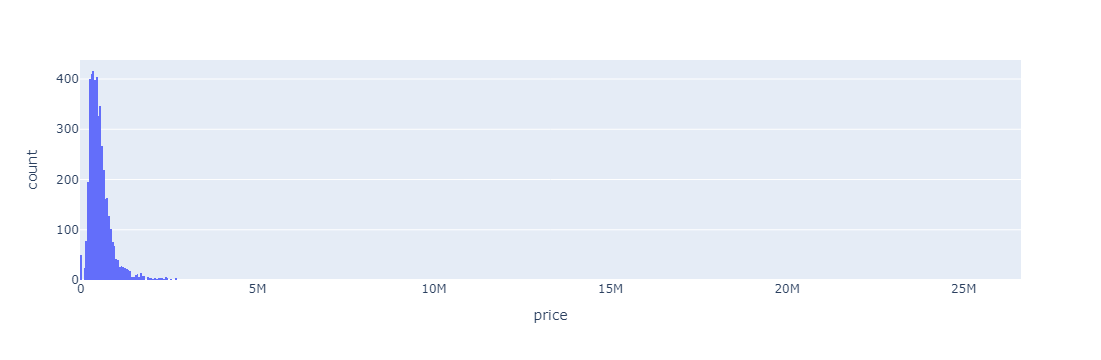

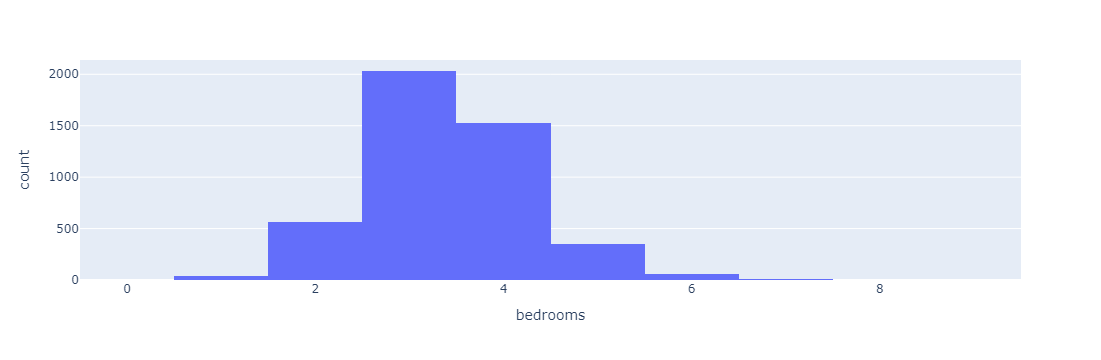

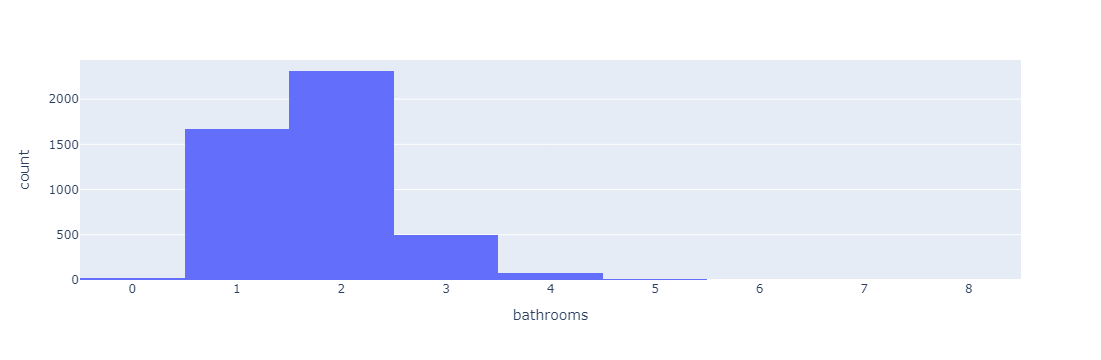

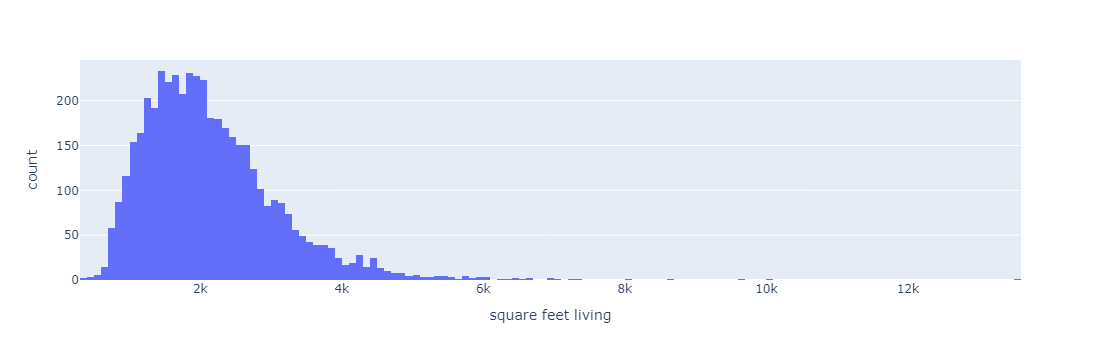

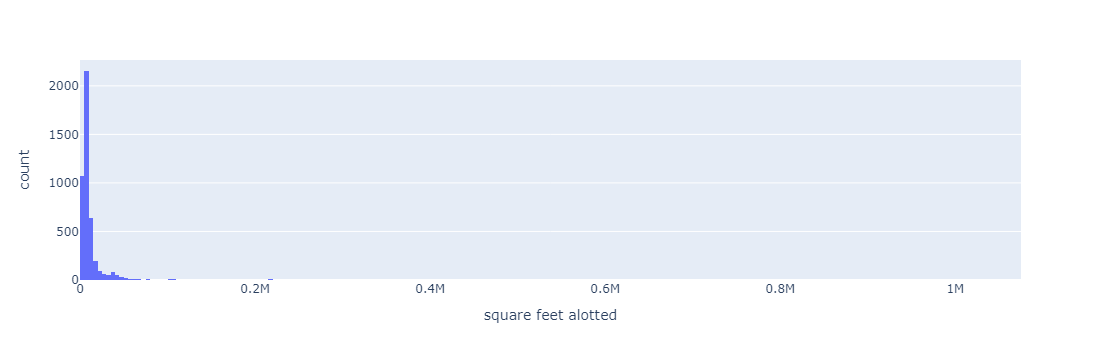

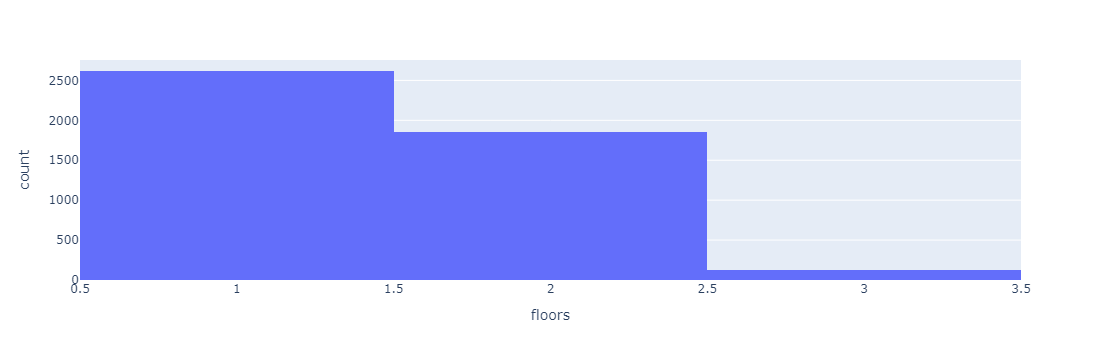

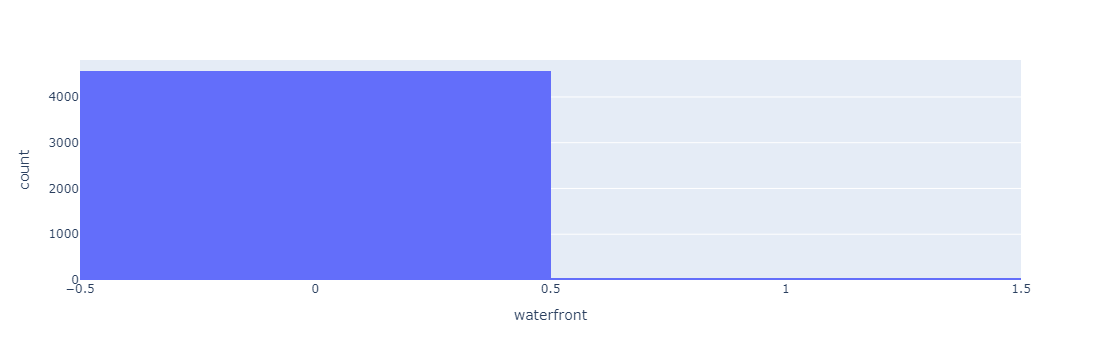

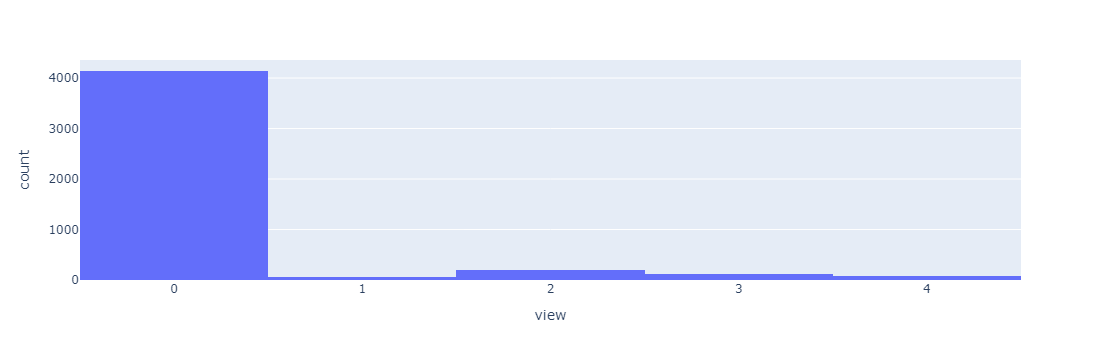

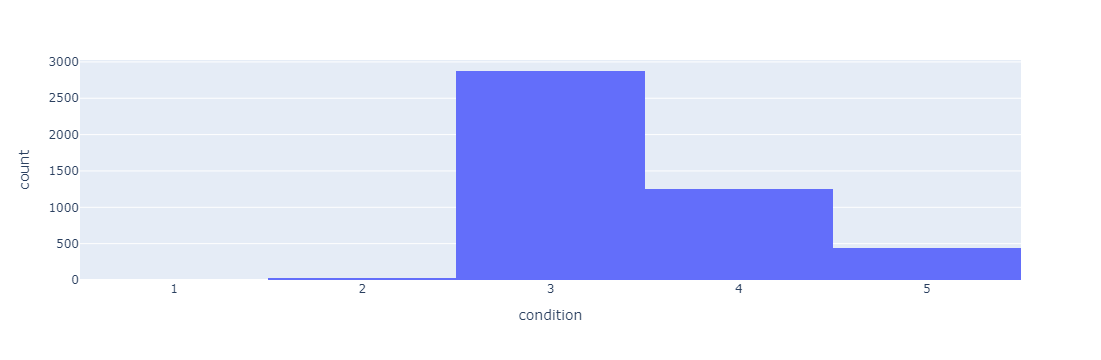

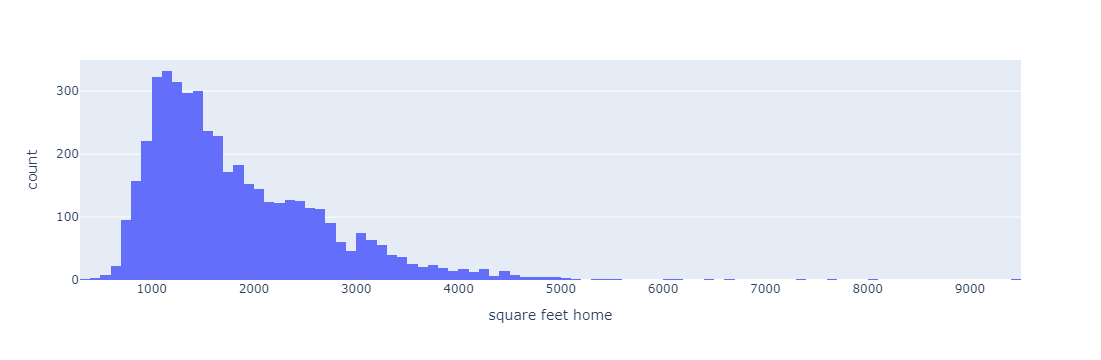

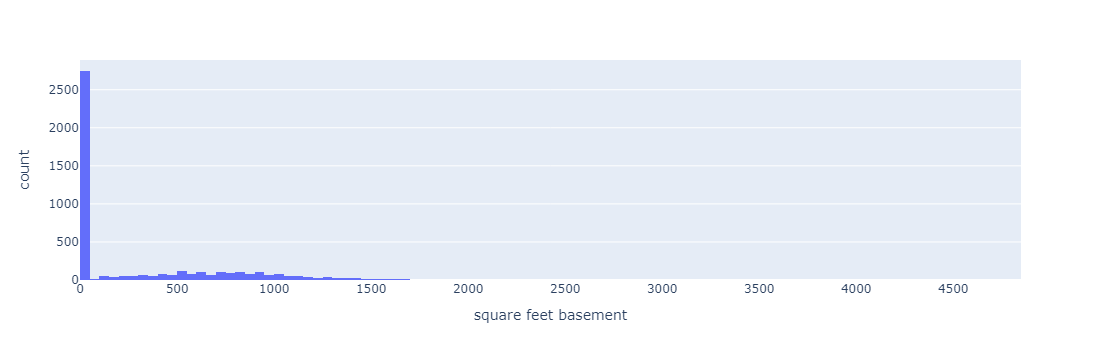

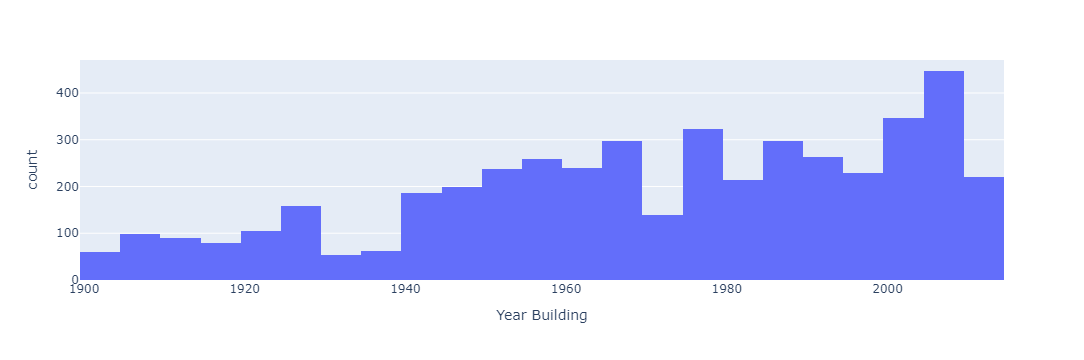

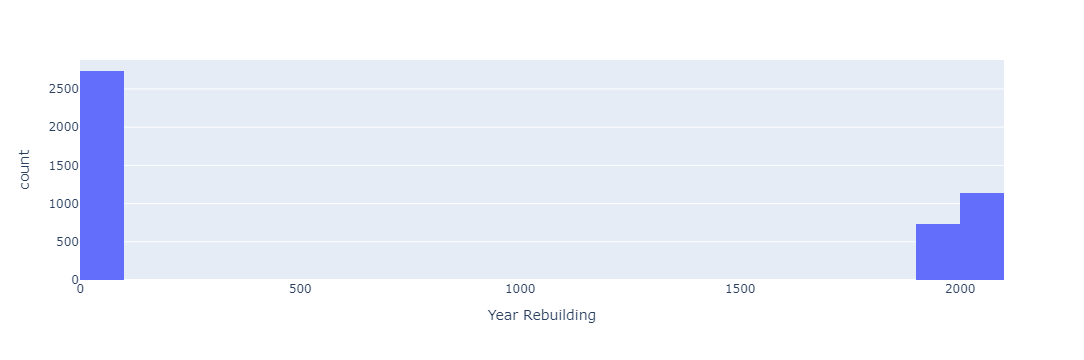

In [19]:
for column in df.select_dtypes(include ="number").columns:
    fig = px.histogram(df, x=column)
    fig.show()

In [21]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers
for column in df.select_dtypes(include ="number").columns:
   outliers = find_outliers_IQR(df[column])
   print("Name Column is :" ,column)
   print("number of outliers: "+ str(len(outliers)))

   print("max outlier value: "+ str(outliers.max()))

   print("min outlier value: "+ str(outliers.min()))
   print("---------------------------------------------------------------------------------------------------------------------------------------")

Name Column is : price
number of outliers: 240
max outlier value: 26590000.0
min outlier value: 1157200.0
---------------------------------------------------------------------------------------------------------------------------------------
Name Column is : bedrooms
number of outliers: 118
max outlier value: 9.0
min outlier value: 0.0
---------------------------------------------------------------------------------------------------------------------------------------
Name Column is : bathrooms
number of outliers: 102
max outlier value: 8.0
min outlier value: 4.0
---------------------------------------------------------------------------------------------------------------------------------------
Name Column is : square feet living
number of outliers: 129
max outlier value: 13540
min outlier value: 4370
---------------------------------------------------------------------------------------------------------------------------------------
Name Column is : square feet alotted
number of o

In [25]:
outlier_columns =['bathrooms'
                  ,'square feet living'
                  ,'square feet alotted'
                  ,'waterfront'
                  ,'view'
                  ,'condition'
                  ,'square feet home'
                  ,'square feet basement']

for column in outlier_columns :
    print("Name Column :" ,column)
    upper_limit = df[column].mean() + 3*df[column].std()
    print("Upper Limit :" , upper_limit)

    lower_limit = df[column].mean() - 3*df[column].std()
    print("lower_limit :" ,lower_limit)

    print("---------------------------------------------------------------------------------------------------------------------------------------")
    df[column] = np.where(df[column] > upper_limit,

   upper_limit,

   np.where(

       df[column] < lower_limit,

       lower_limit,

       df[column]))

Name Column : bathrooms
Upper Limit : 4.045468861298434
lower_limit : -0.46764277434191204
---------------------------------------------------------------------------------------------------------------------------------------
Name Column : square feet living
Upper Limit : 5028.967703804333
lower_limit : -750.2737907608544
---------------------------------------------------------------------------------------------------------------------------------------
Name Column : square feet alotted
Upper Limit : 122505.8245213854
lower_limit : -92800.79234747236
---------------------------------------------------------------------------------------------------------------------------------------
Name Column : waterfront
Upper Limit : 0.2603852287277104
lower_limit : -0.2460374026407539
---------------------------------------------------------------------------------------------------------------------------------------
Name Column : view
Upper Limit : 2.575866325550676
lower_limit : -2.09456197

In [27]:
df.describe()

price  bedrooms  bathrooms  square feet living  \
count     4600.00   4600.00    4600.00             4600.00   
mean    551962.99      3.40       1.78             2125.90   
std     563834.70      0.91       0.73              899.31   
min          0.00      0.00       0.00              370.00   
25%     322875.00      3.00       1.00             1460.00   
50%     460943.46      3.00       2.00             1980.00   
75%     654962.50      4.00       2.00             2620.00   
max   26590000.00      9.00       4.05             5028.97   

       square feet alotted  floors  waterfront    view  condition  \
count              4600.00 4600.00     4600.00 4600.00    4600.00   
mean              12950.03    1.46        0.00    0.21       3.45   
std               19461.22    0.55        0.02    0.65       0.68   
min                 638.00    1.00        0.00    0.00       1.42   
25%                5000.75    1.00        0.00    0.00       3.00   
50%                7683.00    1.00        0.00    0.00       3.00   
75%               11001.25    2.00        0.00    0.00       4.00   
max              122505.82    3.00        0.26    2.58       5.00   

       square feet home  square feet basement  Year Building  Year Rebuilding  
count           4600.00               4600.00        4600.00          4600.00  
mean            1818.45                307.87        1970.79           808.61  
std              823.87                445.71          29.73           979.41  
min              370.00                  0.00        1900.00             0.00  
25%             1190.00                  0.00        1951.00             0.00  
50%             1590.00                  0.00        1976.00             0.00  
75%             2300.00                610.00        1997.00          1999.00  
max             4413.77               1704.49        2014.00          2014.00

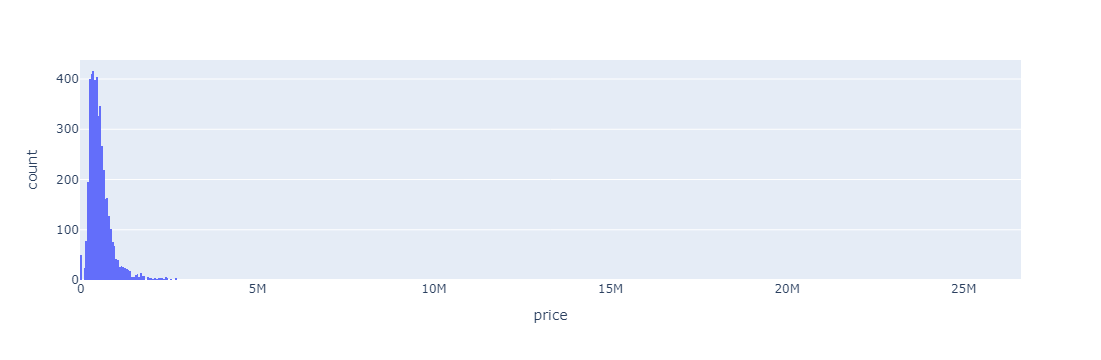

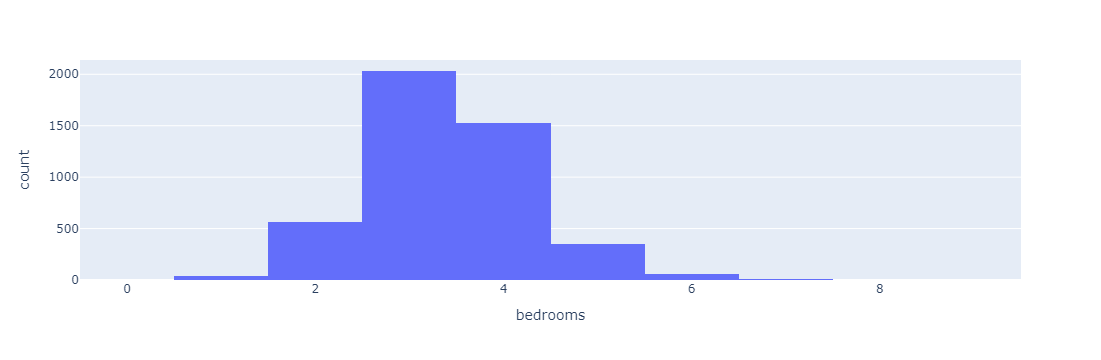

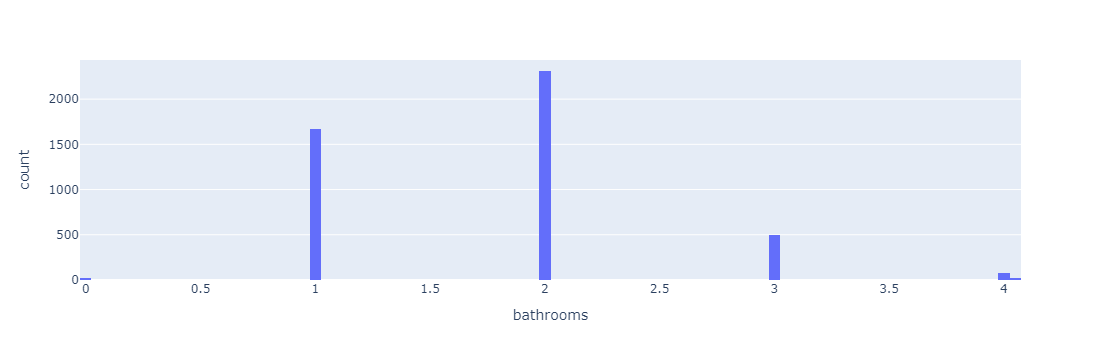

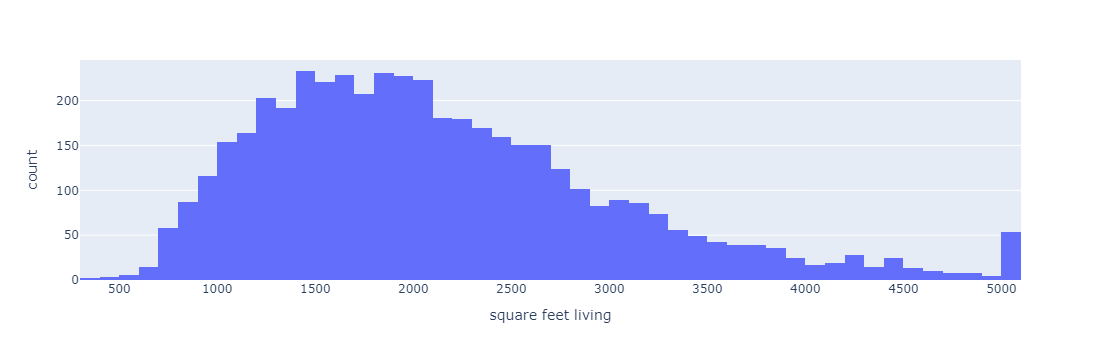

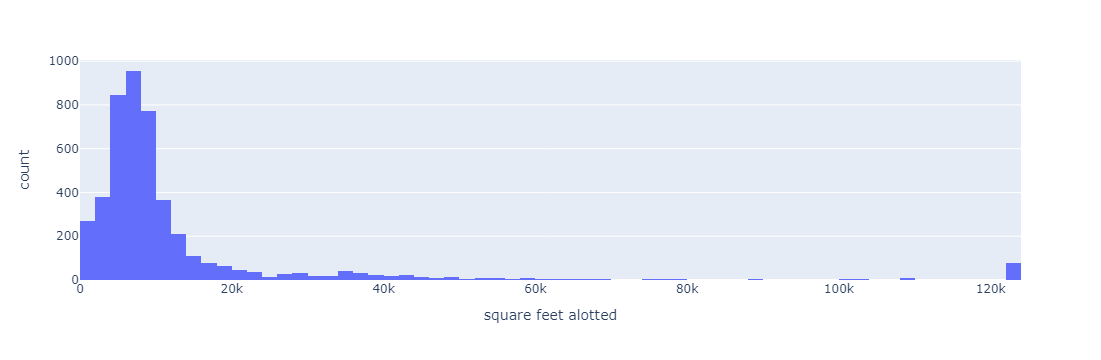

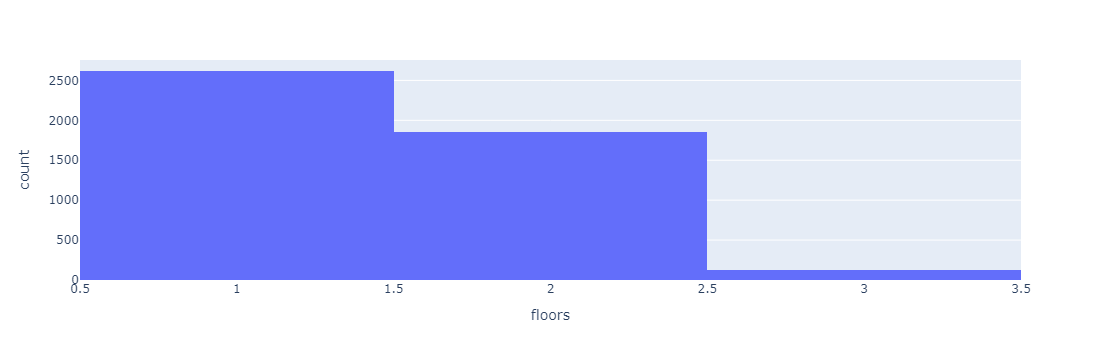

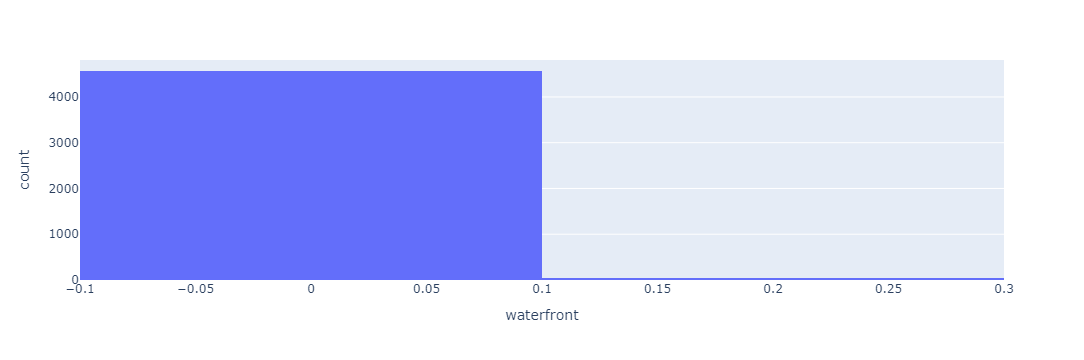

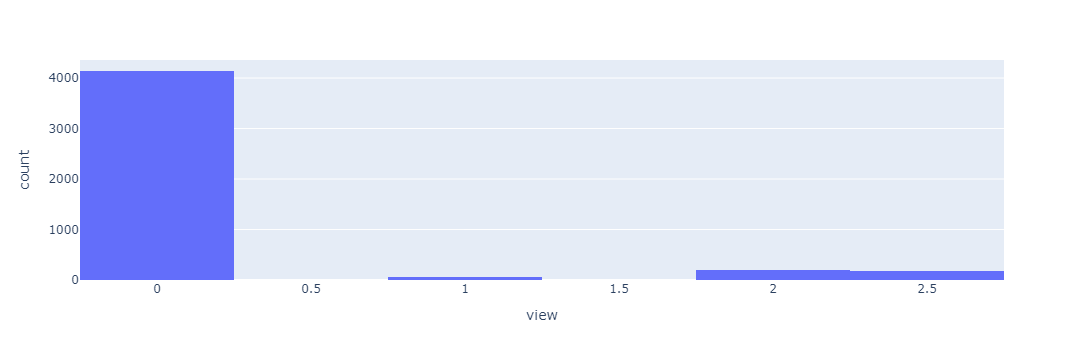

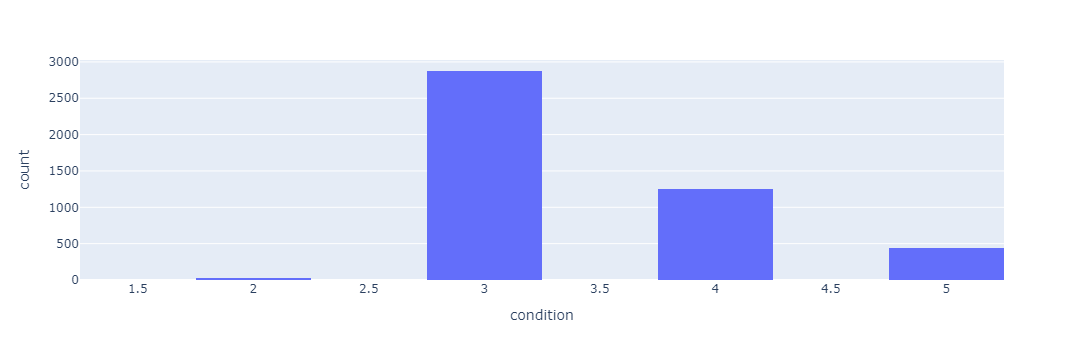

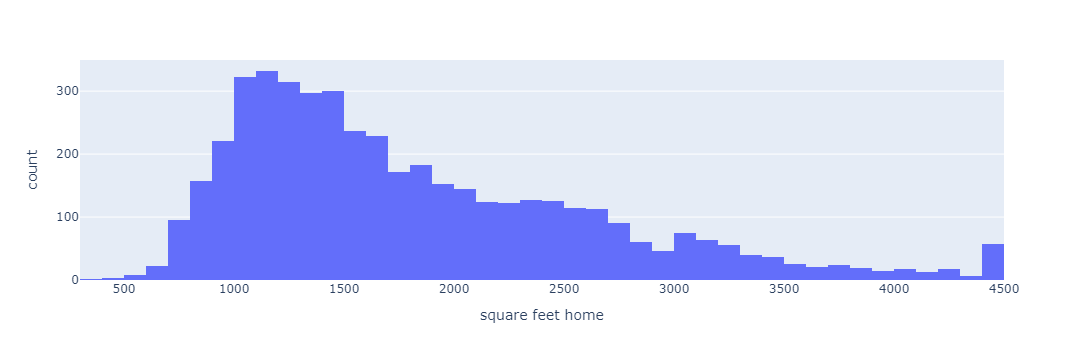

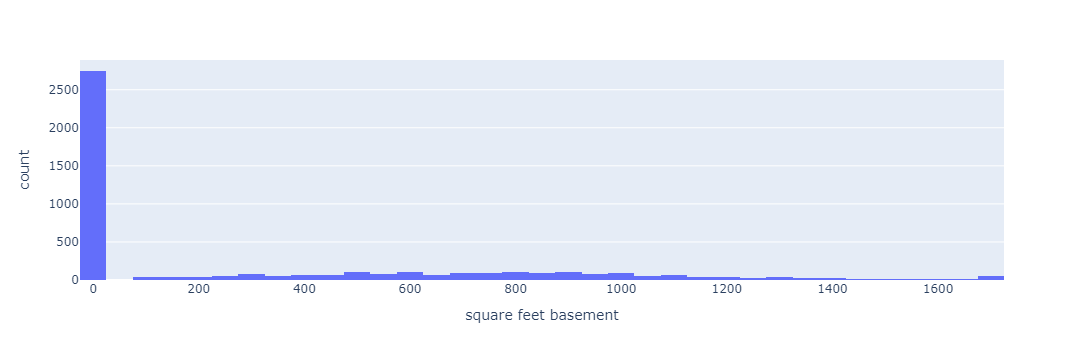

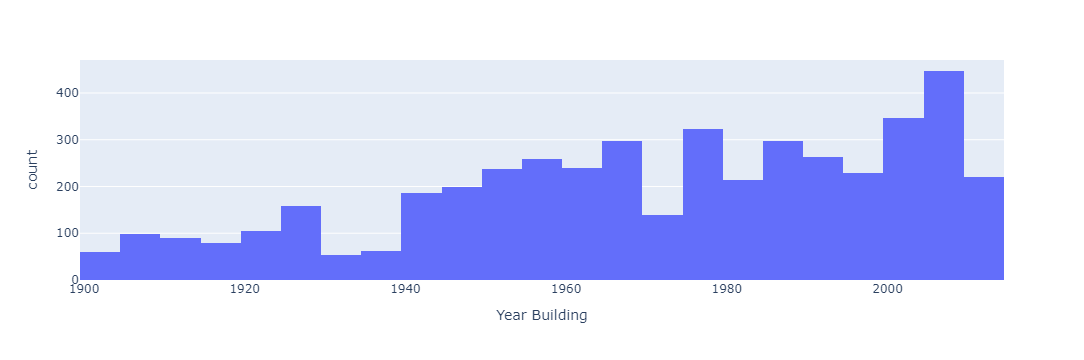

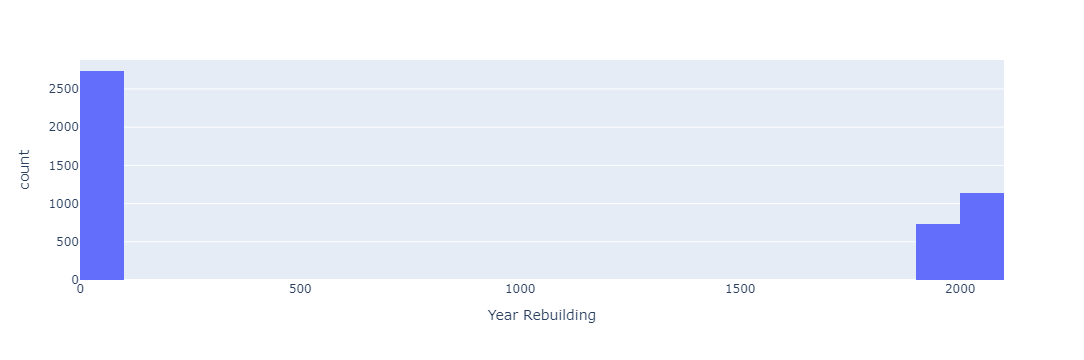

In [29]:
for column in df.select_dtypes(include ="number").columns:
    fig = px.histogram(df, x=column)
    fig.show()


In [31]:
df.drop("date" ,axis =1 ,inplace =True)

In [33]:
# make function for count plot and scatter plots for Categorical features

def Categorical_Plot(column,rotation=0):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        pd.Series(df[column]).value_counts().plot(kind='bar')
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Count\n", fontsize = 15)

        plt.subplot(1, 2, 2)
        sns.barplot(x = data[column], y = data.price)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

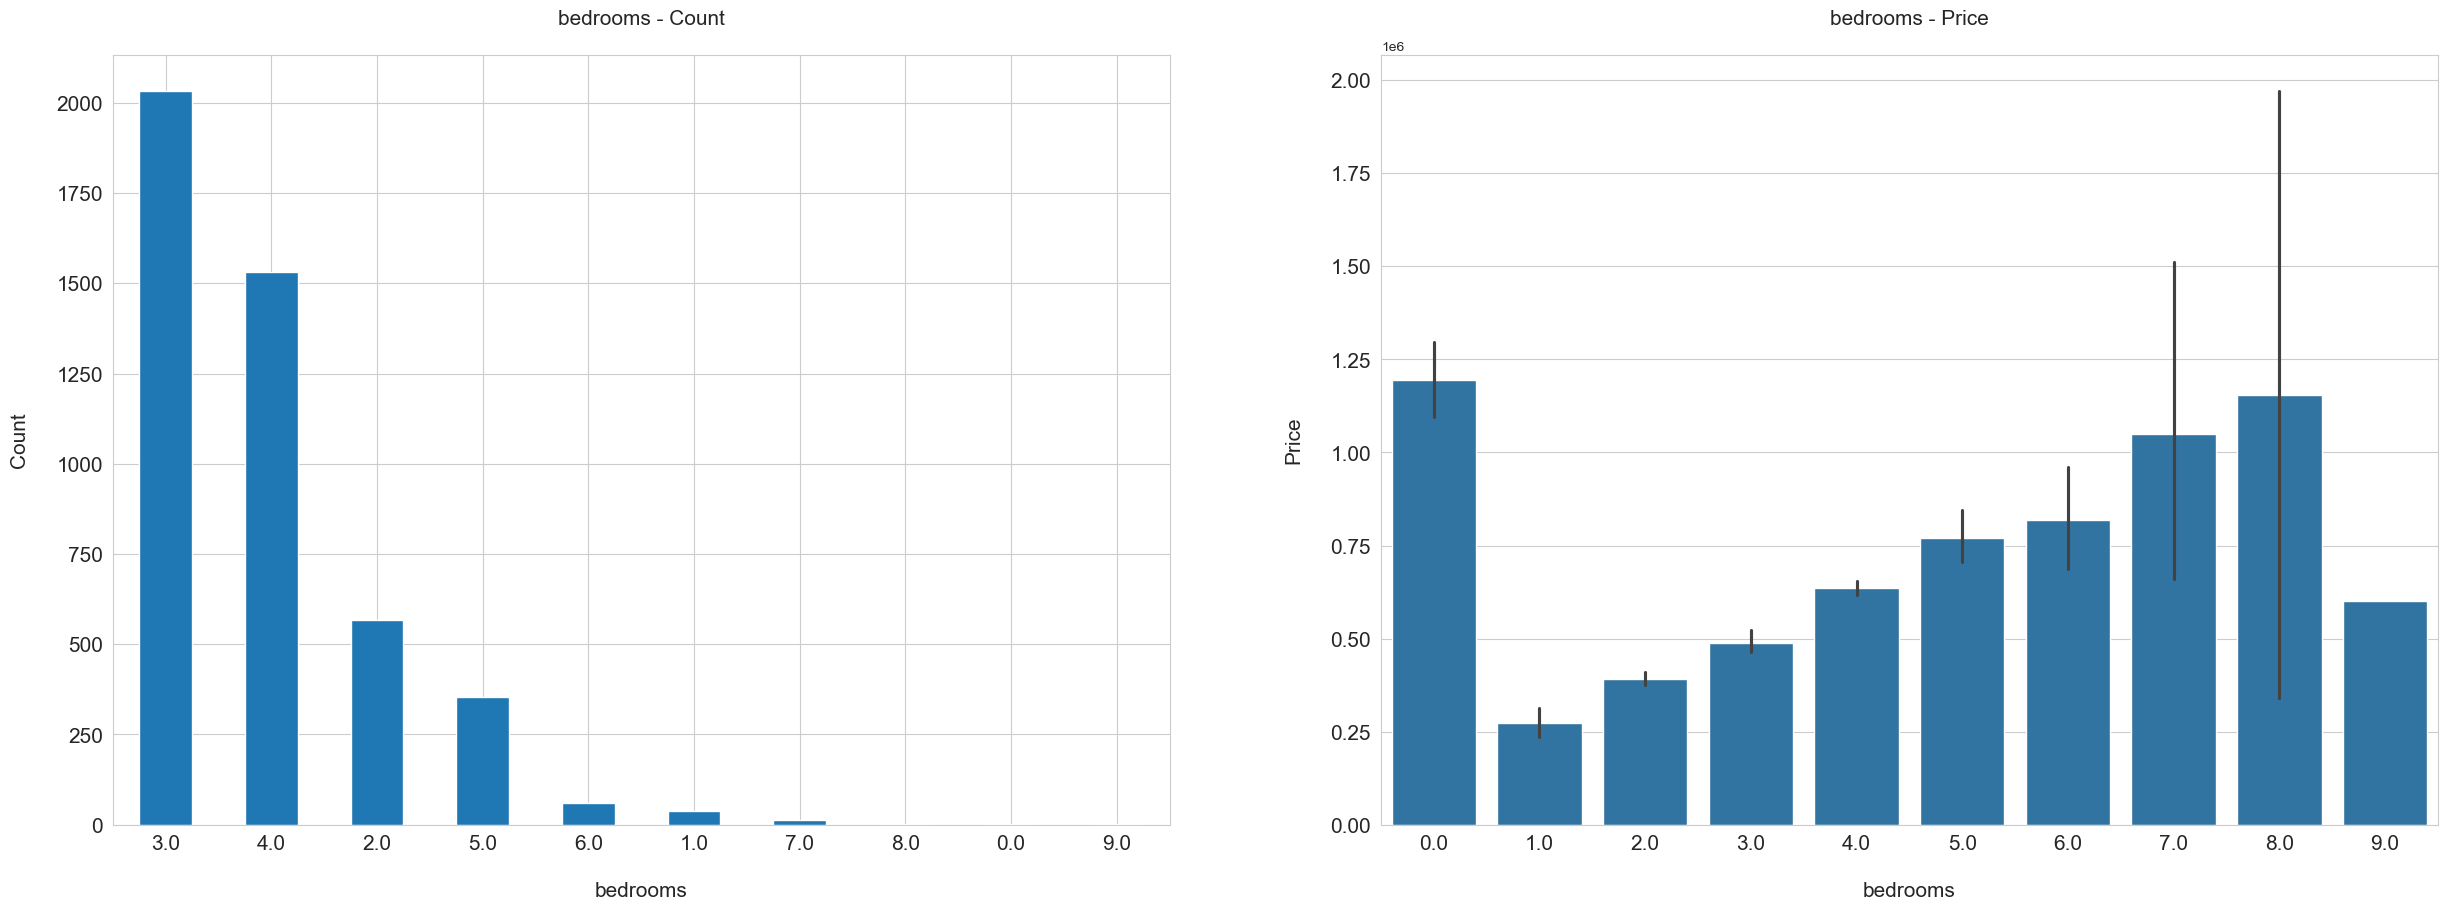

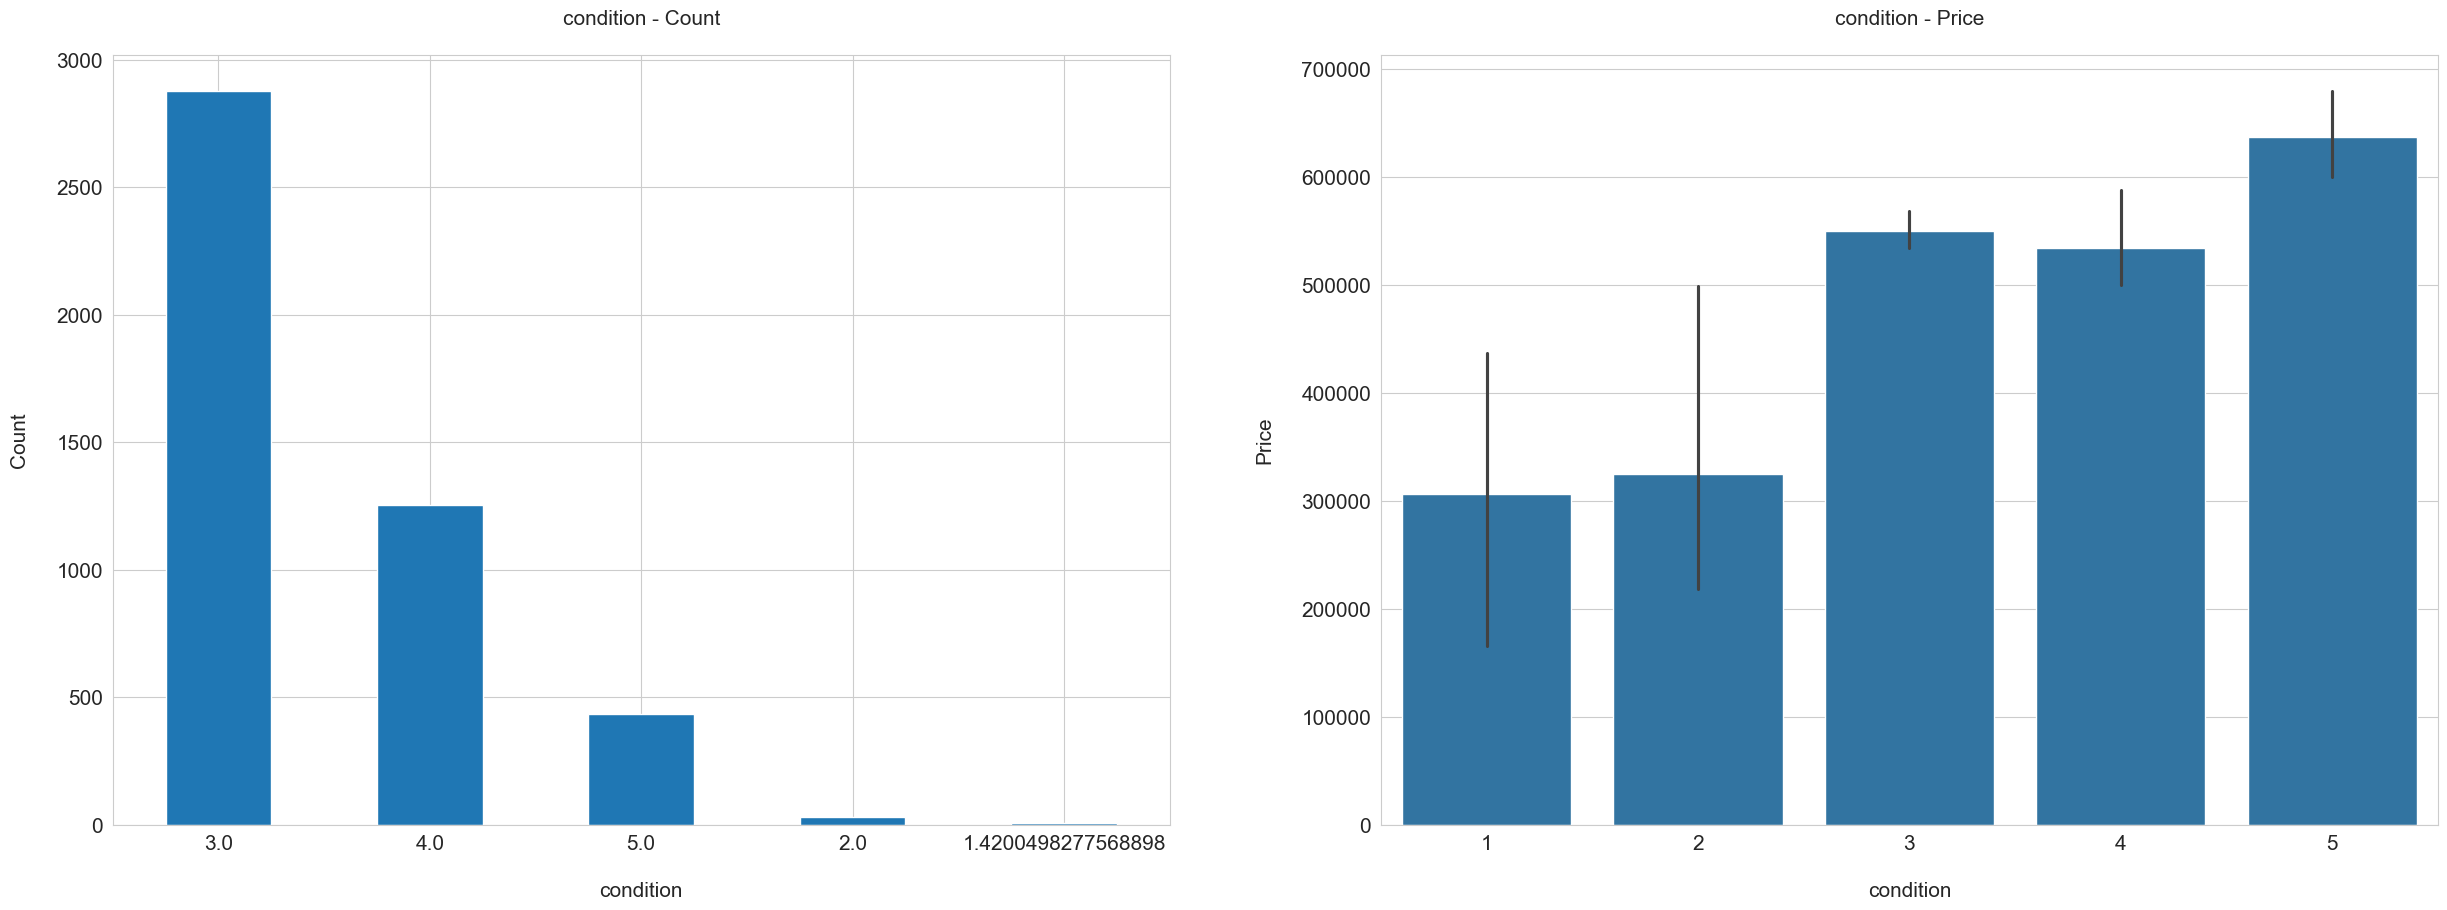

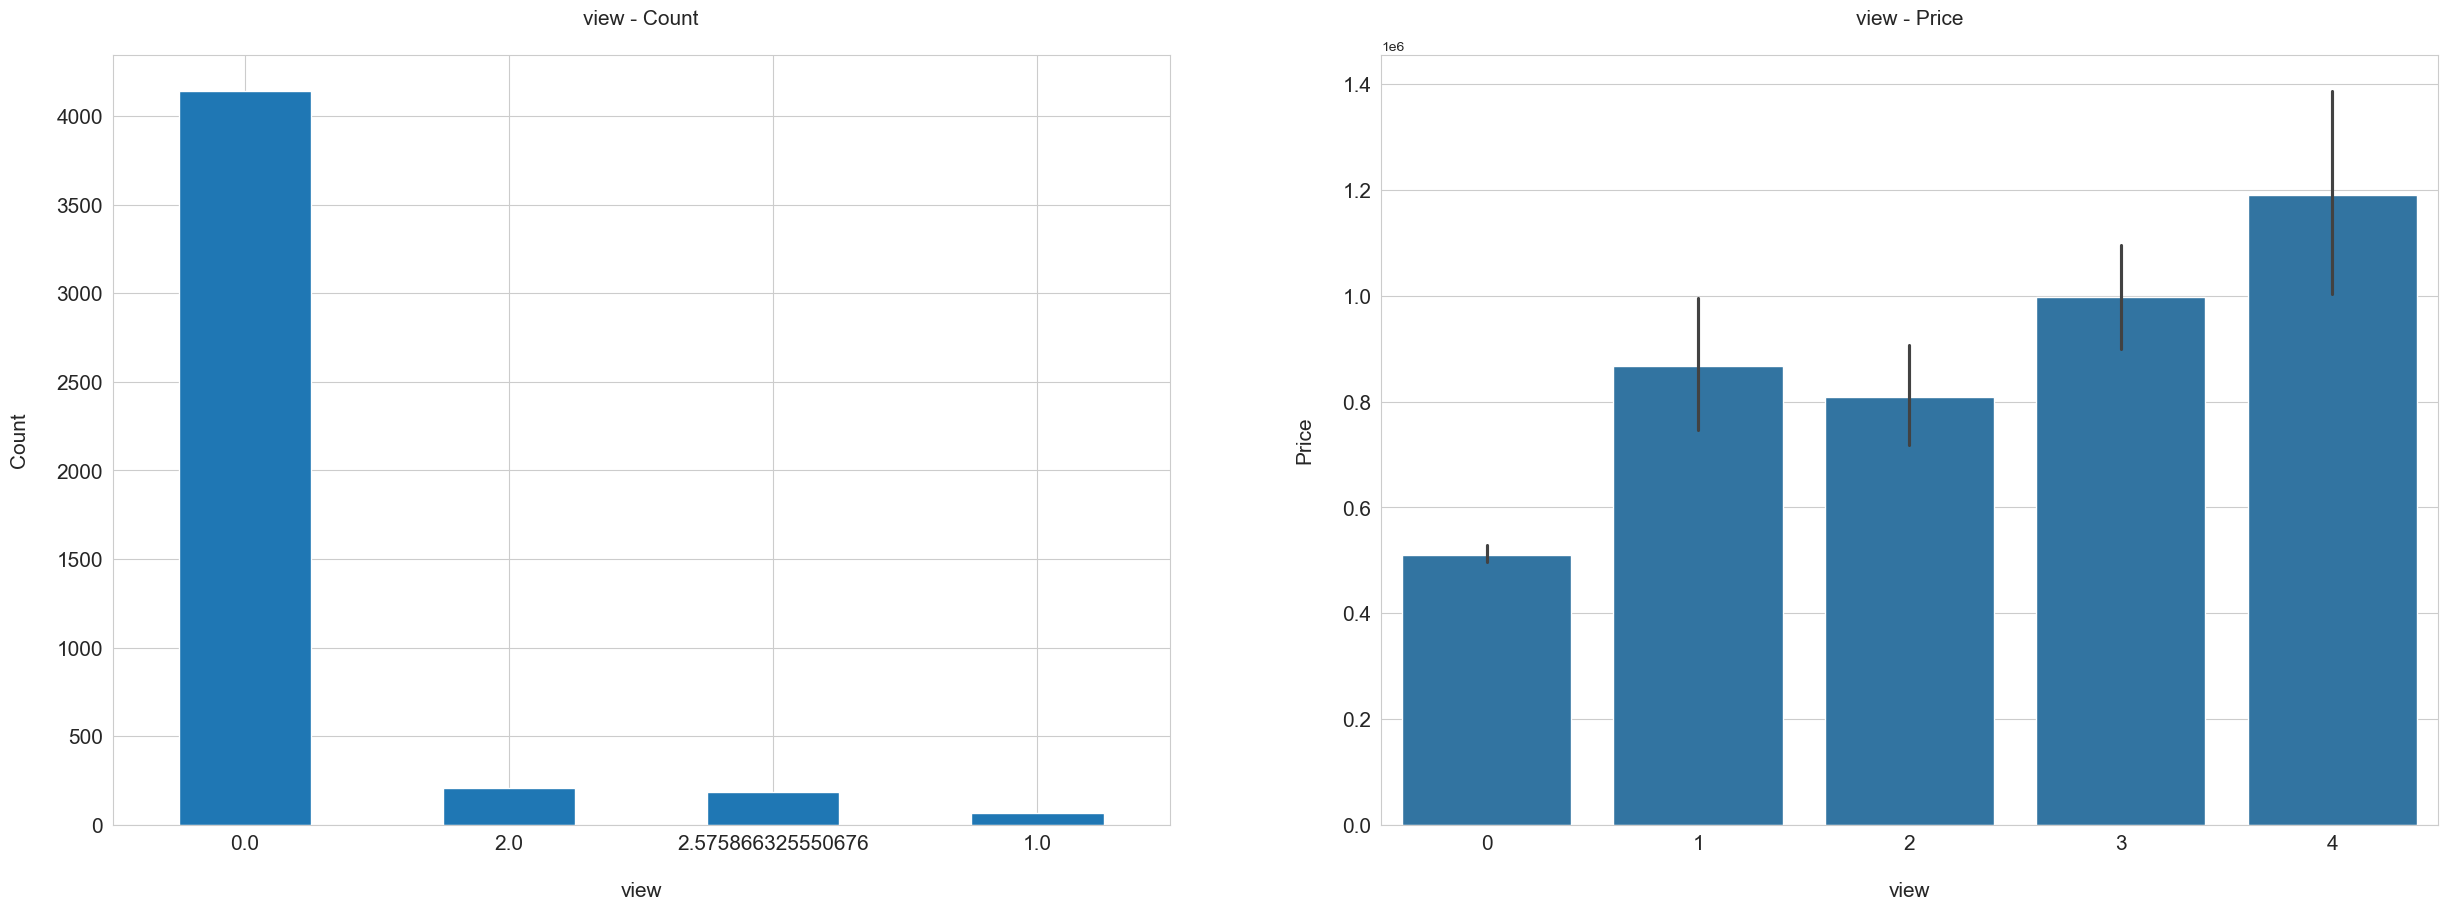

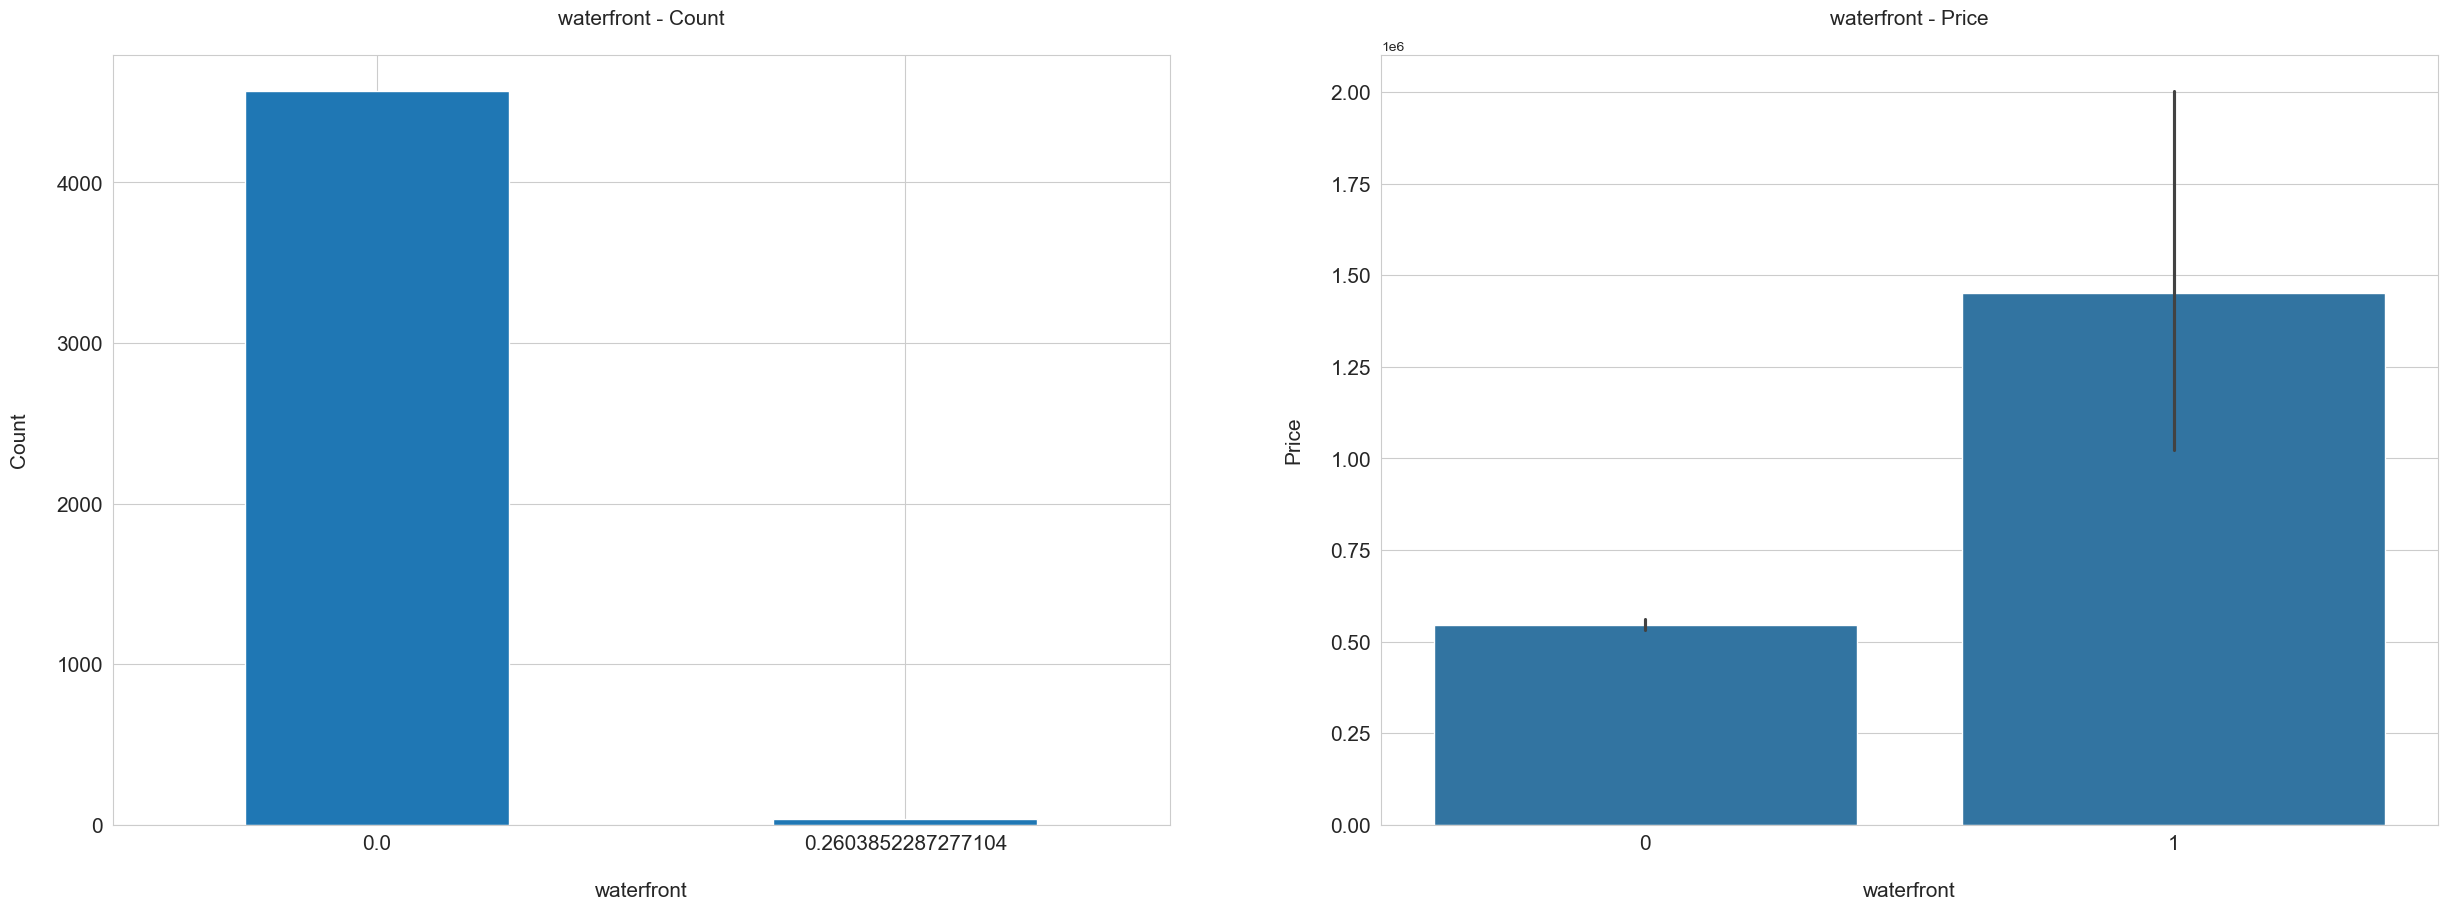

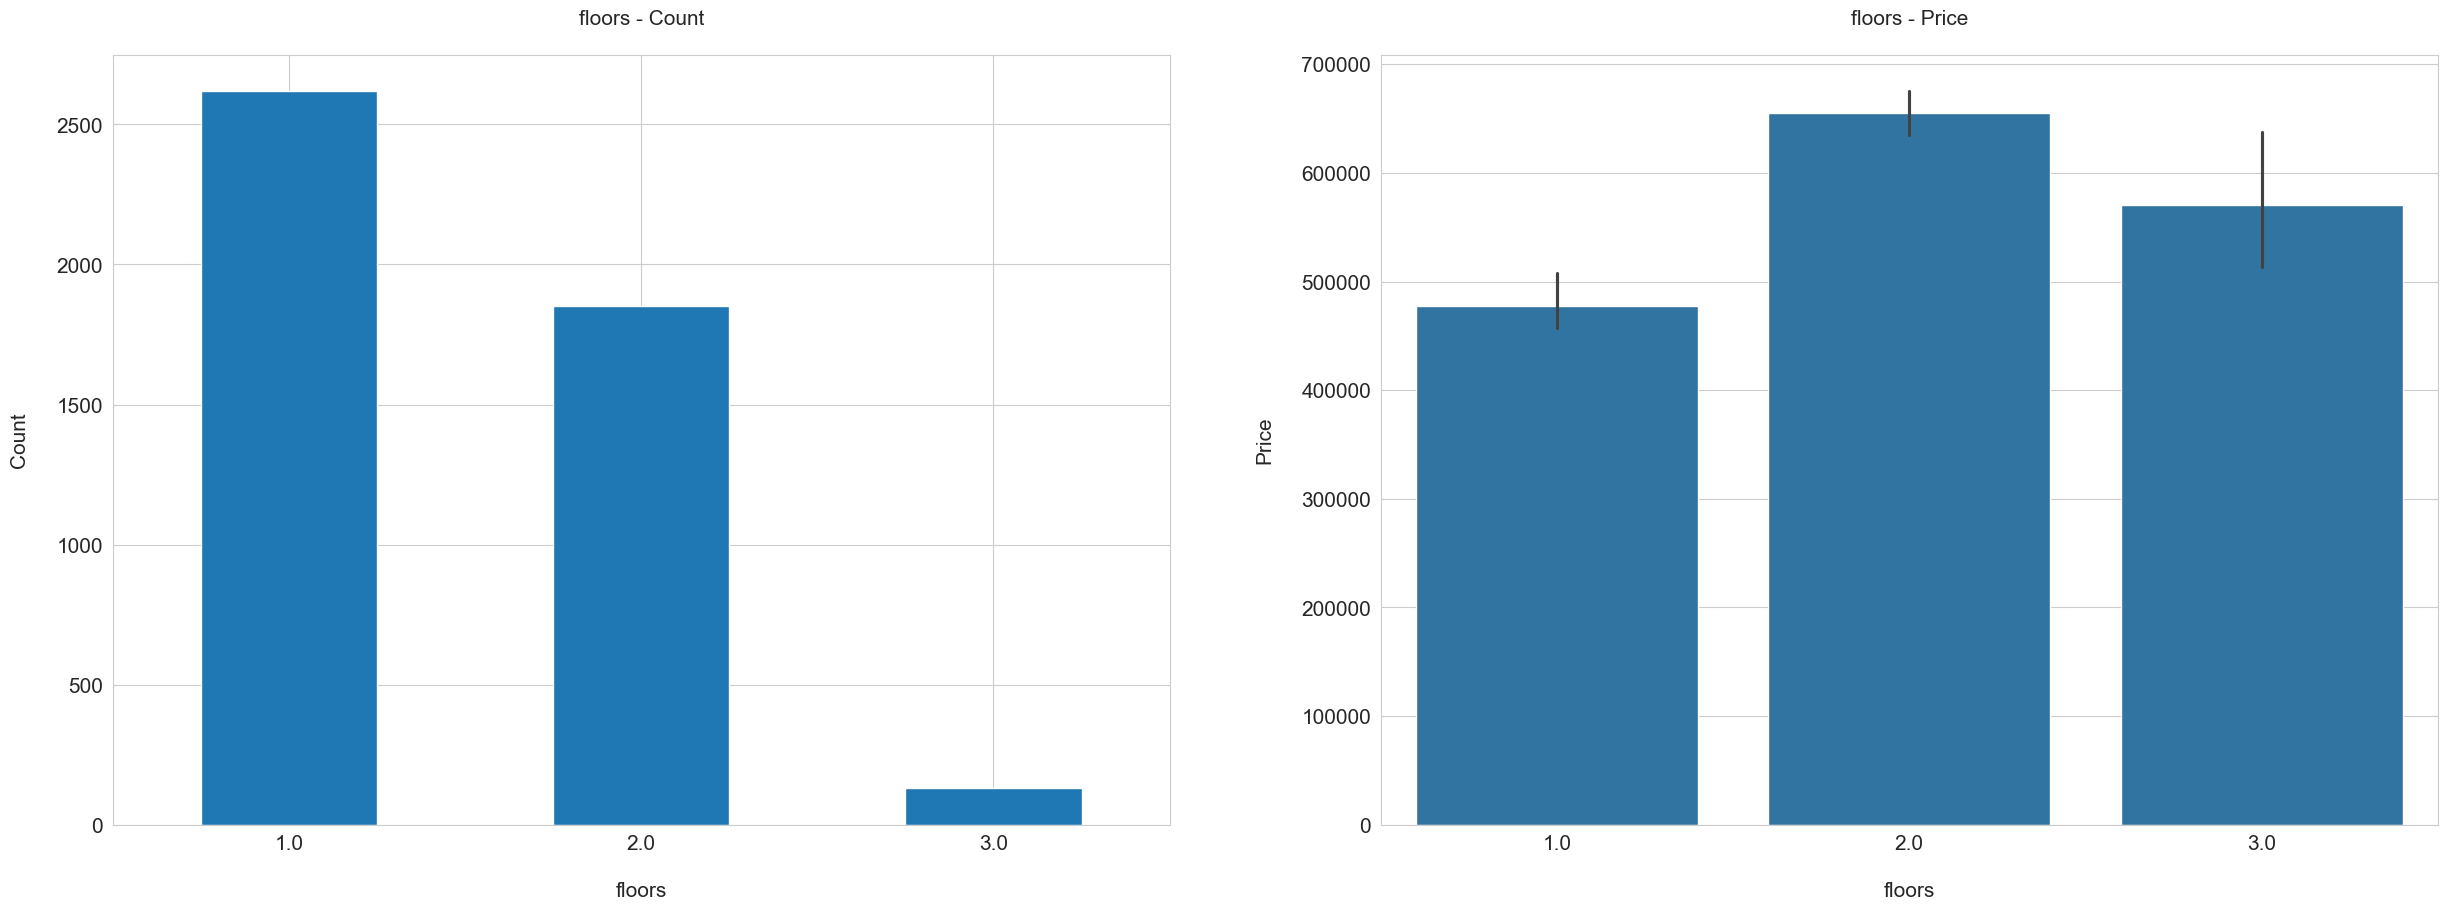

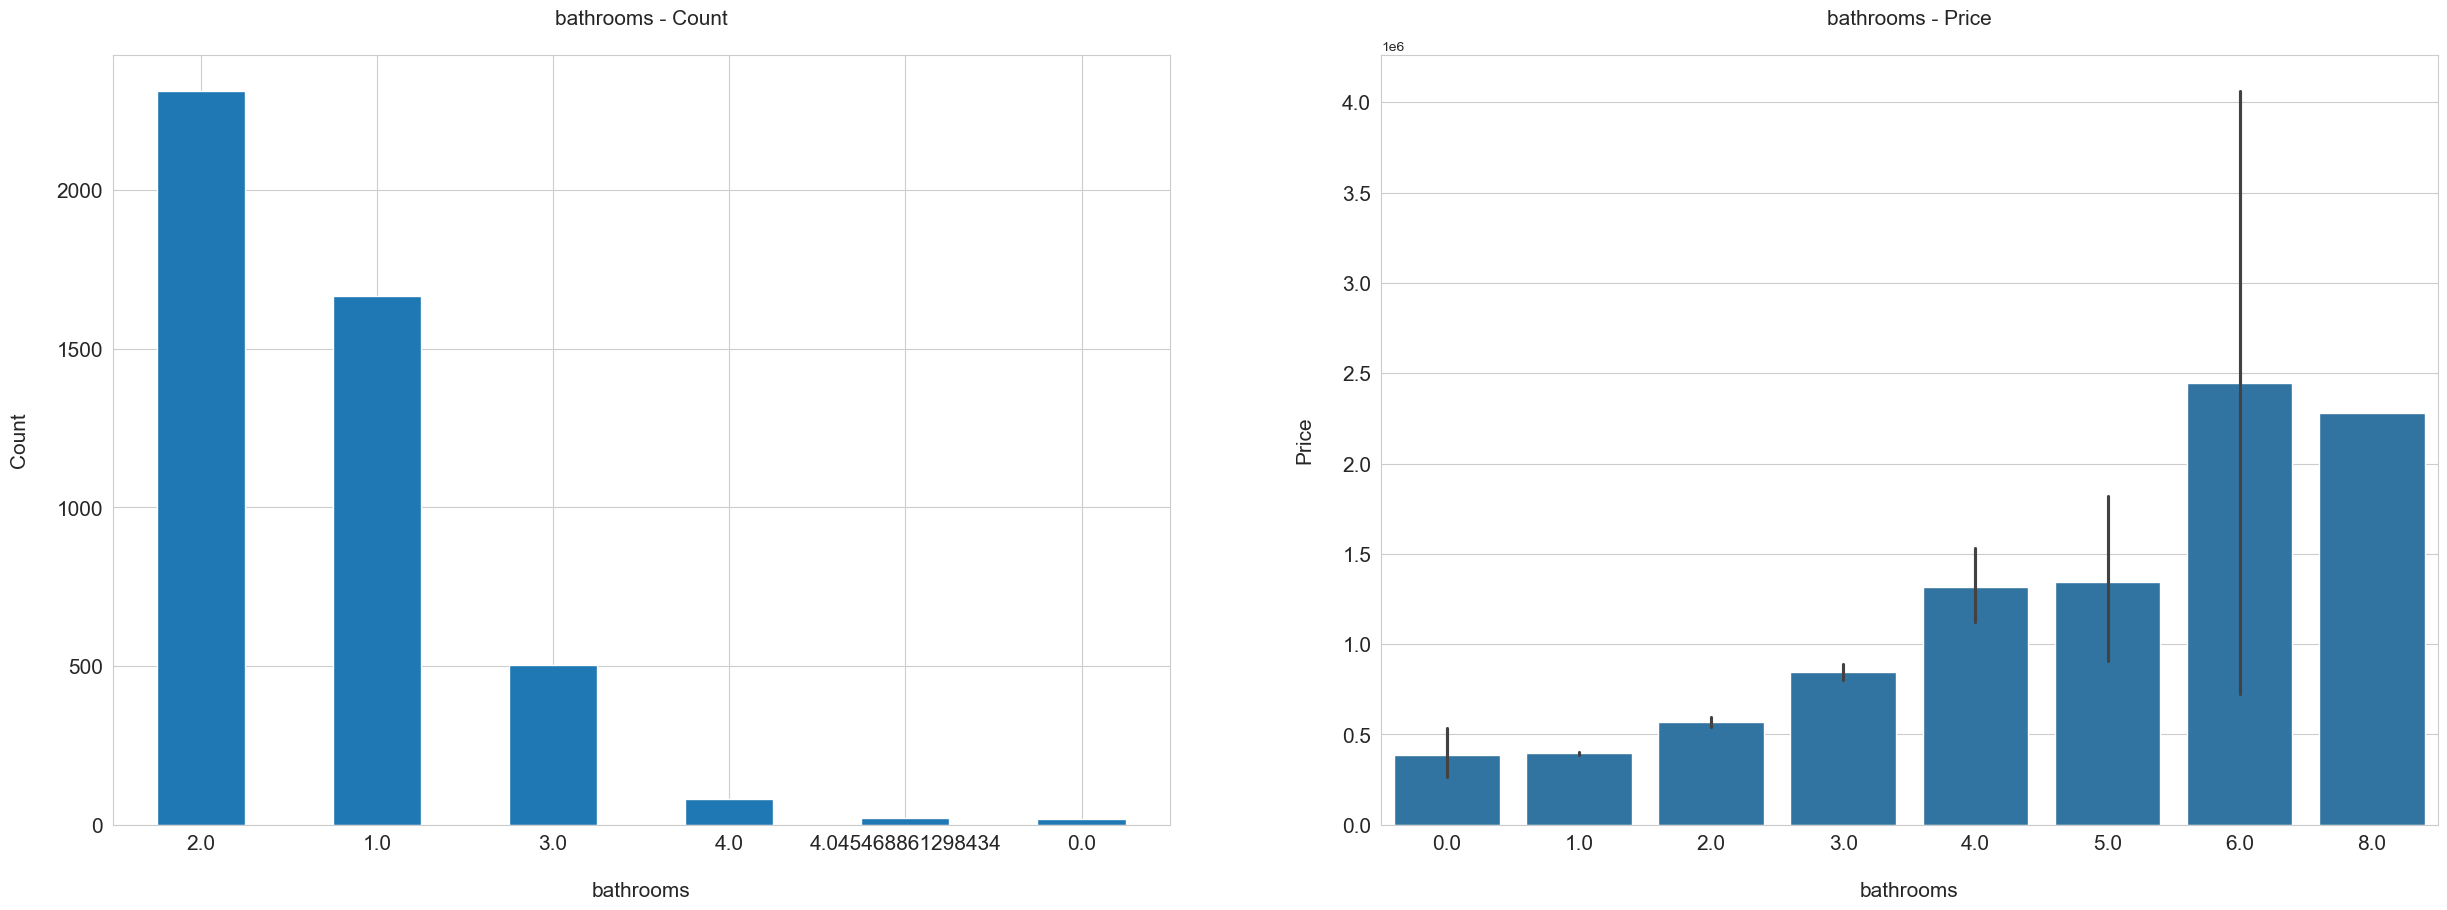

In [35]:
Categorical_Plot("bedrooms")

Categorical_Plot("condition")

Categorical_Plot("view")

Categorical_Plot("waterfront")

Categorical_Plot("floors")

Categorical_Plot("bathrooms")

In [37]:
def Numerical_Plot(column):
    
        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(df[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.scatterplot(x=df[column],y=df["price"],hue=df[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)
        plt.show()
        print()

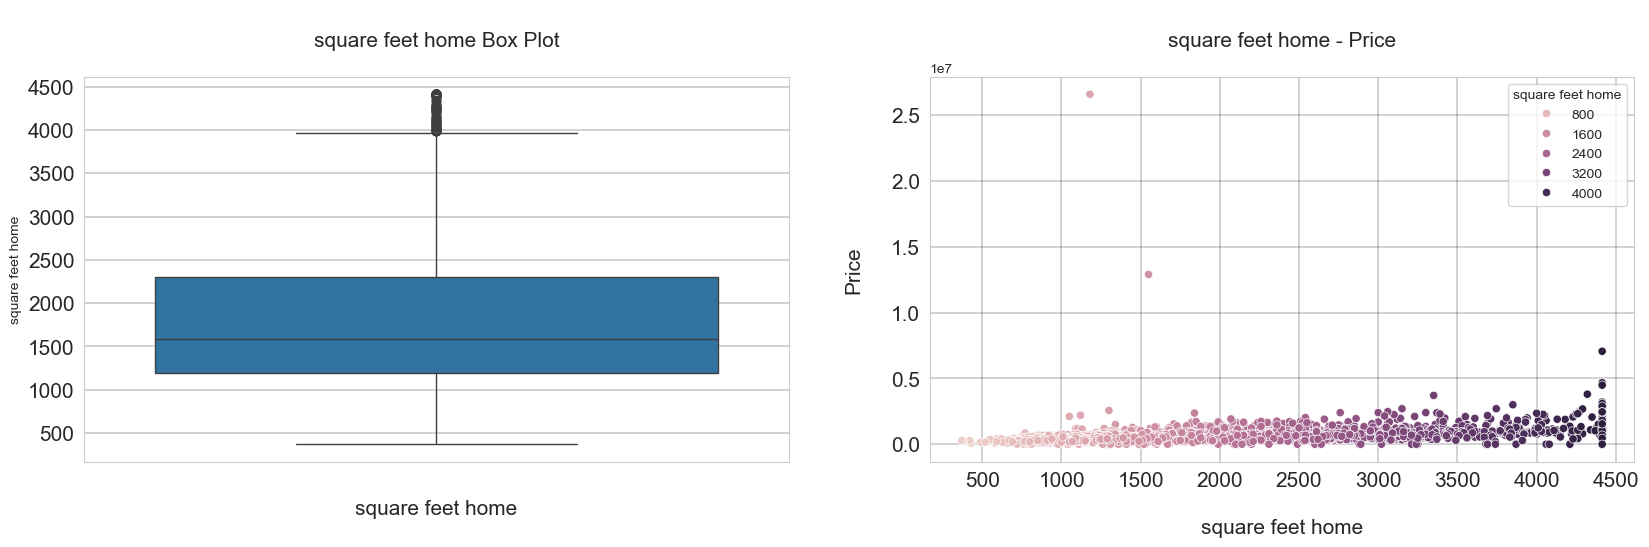

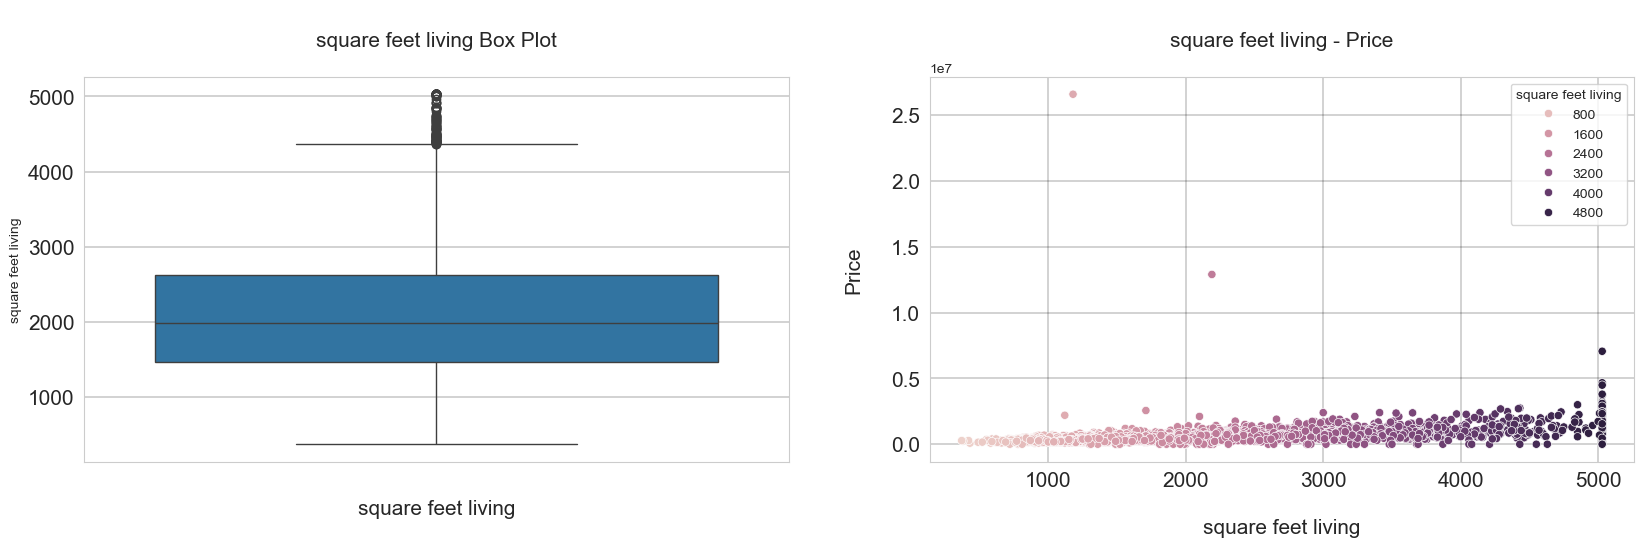

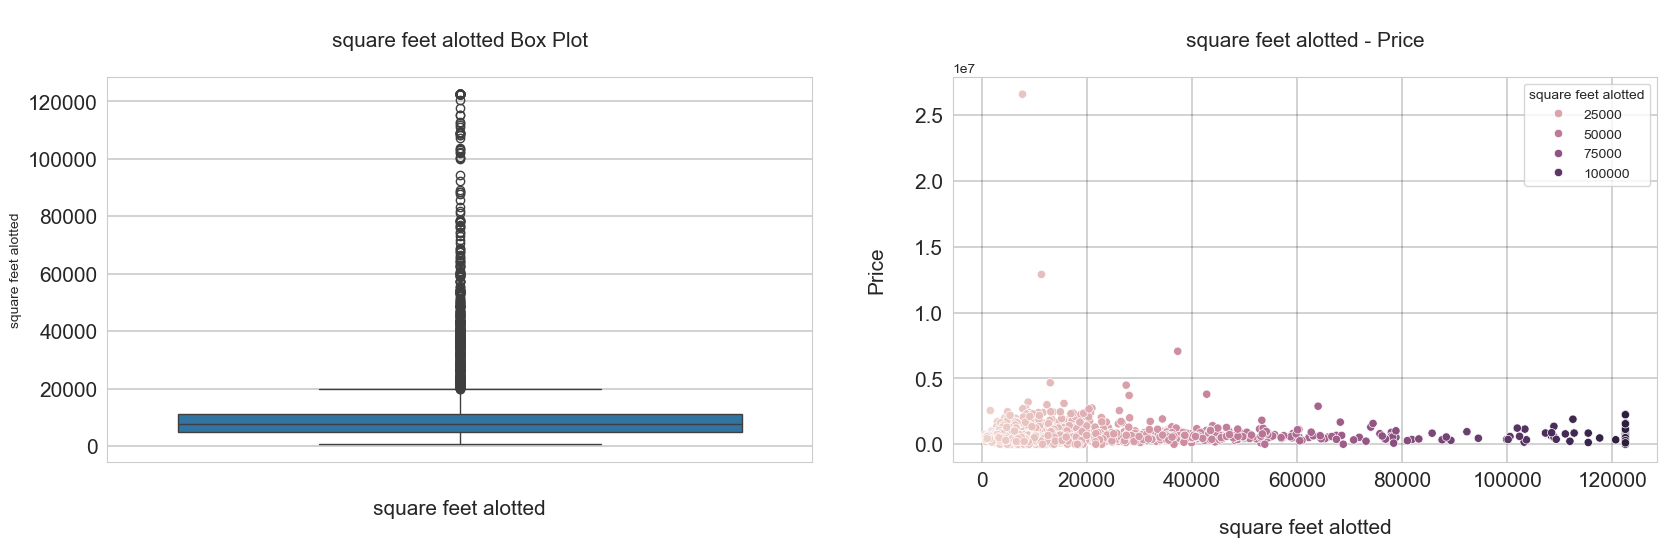

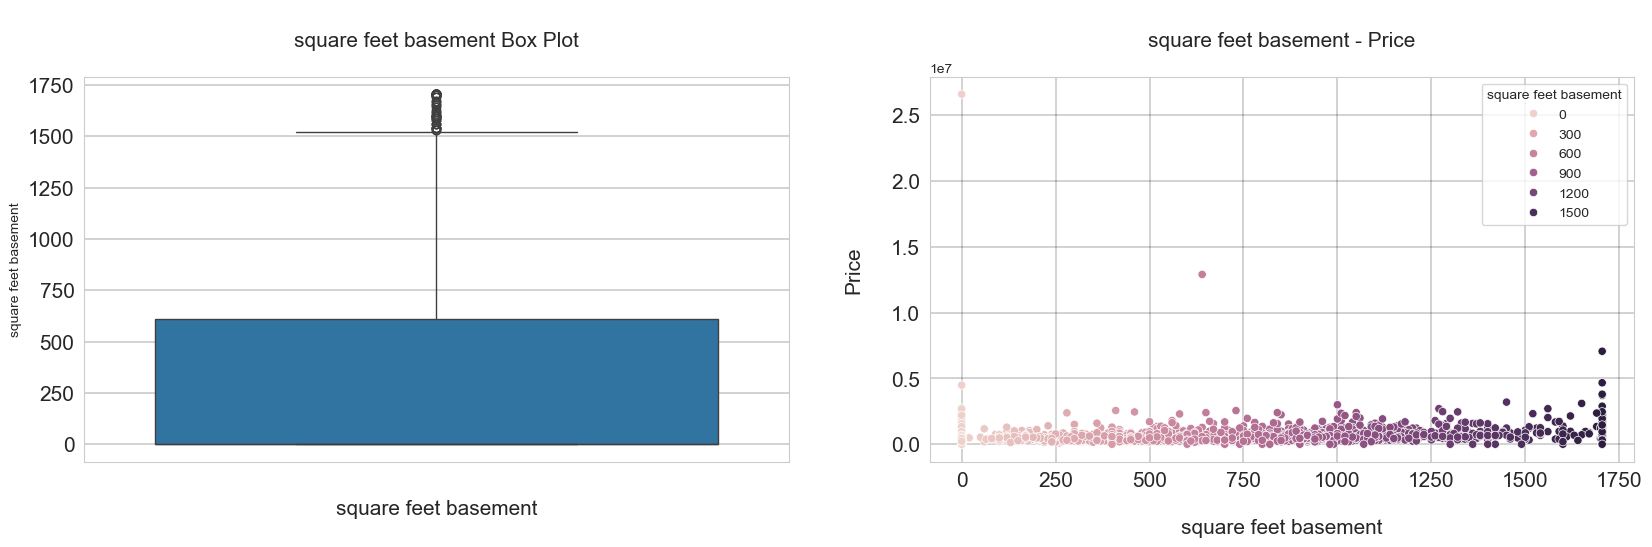

In [39]:
Numerical_Plot('square feet home')

Numerical_Plot("square feet living")

Numerical_Plot("square feet alotted")

Numerical_Plot("square feet basement")

In [41]:
pd.set_option('display.max_rows', None) #show all of rows .
df.groupby(['bedrooms','bathrooms']).agg({'price':['count','min','max']})

price                       
                   count        min         max
bedrooms bathrooms                             
0.00     0.00          2 1095000.00  1295648.00
1.00     0.00          8   80000.00   527550.00
         1.00         28       0.00   540000.00
         2.00          2  115000.00   458000.00
2.00     0.00          7  100000.00   562100.00
         1.00        441       0.00  1065000.00
         2.00        114       0.00  1695000.00
         3.00          4  405000.00   589900.00
3.00     0.00          1  150000.00   150000.00
         1.00        898       0.00  1690000.00
         2.00       1008       0.00 26590000.00
         3.00        118       0.00  2475000.00
         4.00          7       0.00  1600000.00
4.00     0.00          1  142500.00   142500.00
         1.00        255       0.00  2199900.00
         2.00        991       0.00  2555000.00
         3.00        250       0.00  4489000.00
         4.00         29       0.00  3000000.00
         4.05          5       0.00  2458000.00
5.00     1.00         37       0.00  1346400.00
         2.00        167       0.00  2384000.00
         3.00        110       0.00  2680000.00
         4.00         30       0.00  7062500.00
         4.05          9       0.00  4668000.00
6.00     1.00          7  175000.00   823000.00
         2.00         26       0.00  2180000.00
         3.00         16       0.00  1750000.00
         4.00          9  315000.00  3100000.00
         4.05          3  300000.00  1600000.00
7.00     2.00          2  280000.00   599000.00
         3.00          3  350000.00  1950000.00
         4.00          6  550000.00  3200000.00
         4.05          3  540000.00  2280000.00
8.00     2.00          1  340000.00   340000.00
         3.00          1 1970000.00  1970000.00
9.00     4.00          1  599999.00   599999.00

In [43]:
#In the box below, we would like to know the features of the most expensive and the cheapest house.
print("--->Most Expensive House.")

max_price_index = df["price"].idxmax()
row_with_max_price = df.loc[max_price_index]
print(row_with_max_price)
print("-------------------------------------------------------------------------------------------------------------")
print("--->chepest House.")

max_price_index = df["price"].idxmin()
row_with_max_price = df.loc[max_price_index]
print(row_with_max_price)

--->Most Expensive House.
price                         26590000.00
bedrooms                             3.00
bathrooms                            2.00
square feet living                1180.00
square feet alotted               7793.00
floors                               1.00
waterfront                           0.00
view                                 0.00
condition                            4.00
square feet home                  1180.00
square feet basement                 0.00
Year Building                        1992
Year Rebuilding                         0
street                  12005 SE 219th Ct
city                                 Kent
statezip                         WA 98031
country                               USA
Name: 4350, dtype: object
-------------------------------------------------------------------------------------------------------------
--->chepest House.
price                              0.00
bedrooms                           3.00
bathrooms                

In [45]:
numeric_cols =df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['price', 'bedrooms', 'bathrooms', 'square feet living',
       'square feet alotted', 'floors', 'waterfront', 'view', 'condition',
       'square feet home', 'square feet basement', 'Year Building',
       'Year Rebuilding'],
      dtype='object')

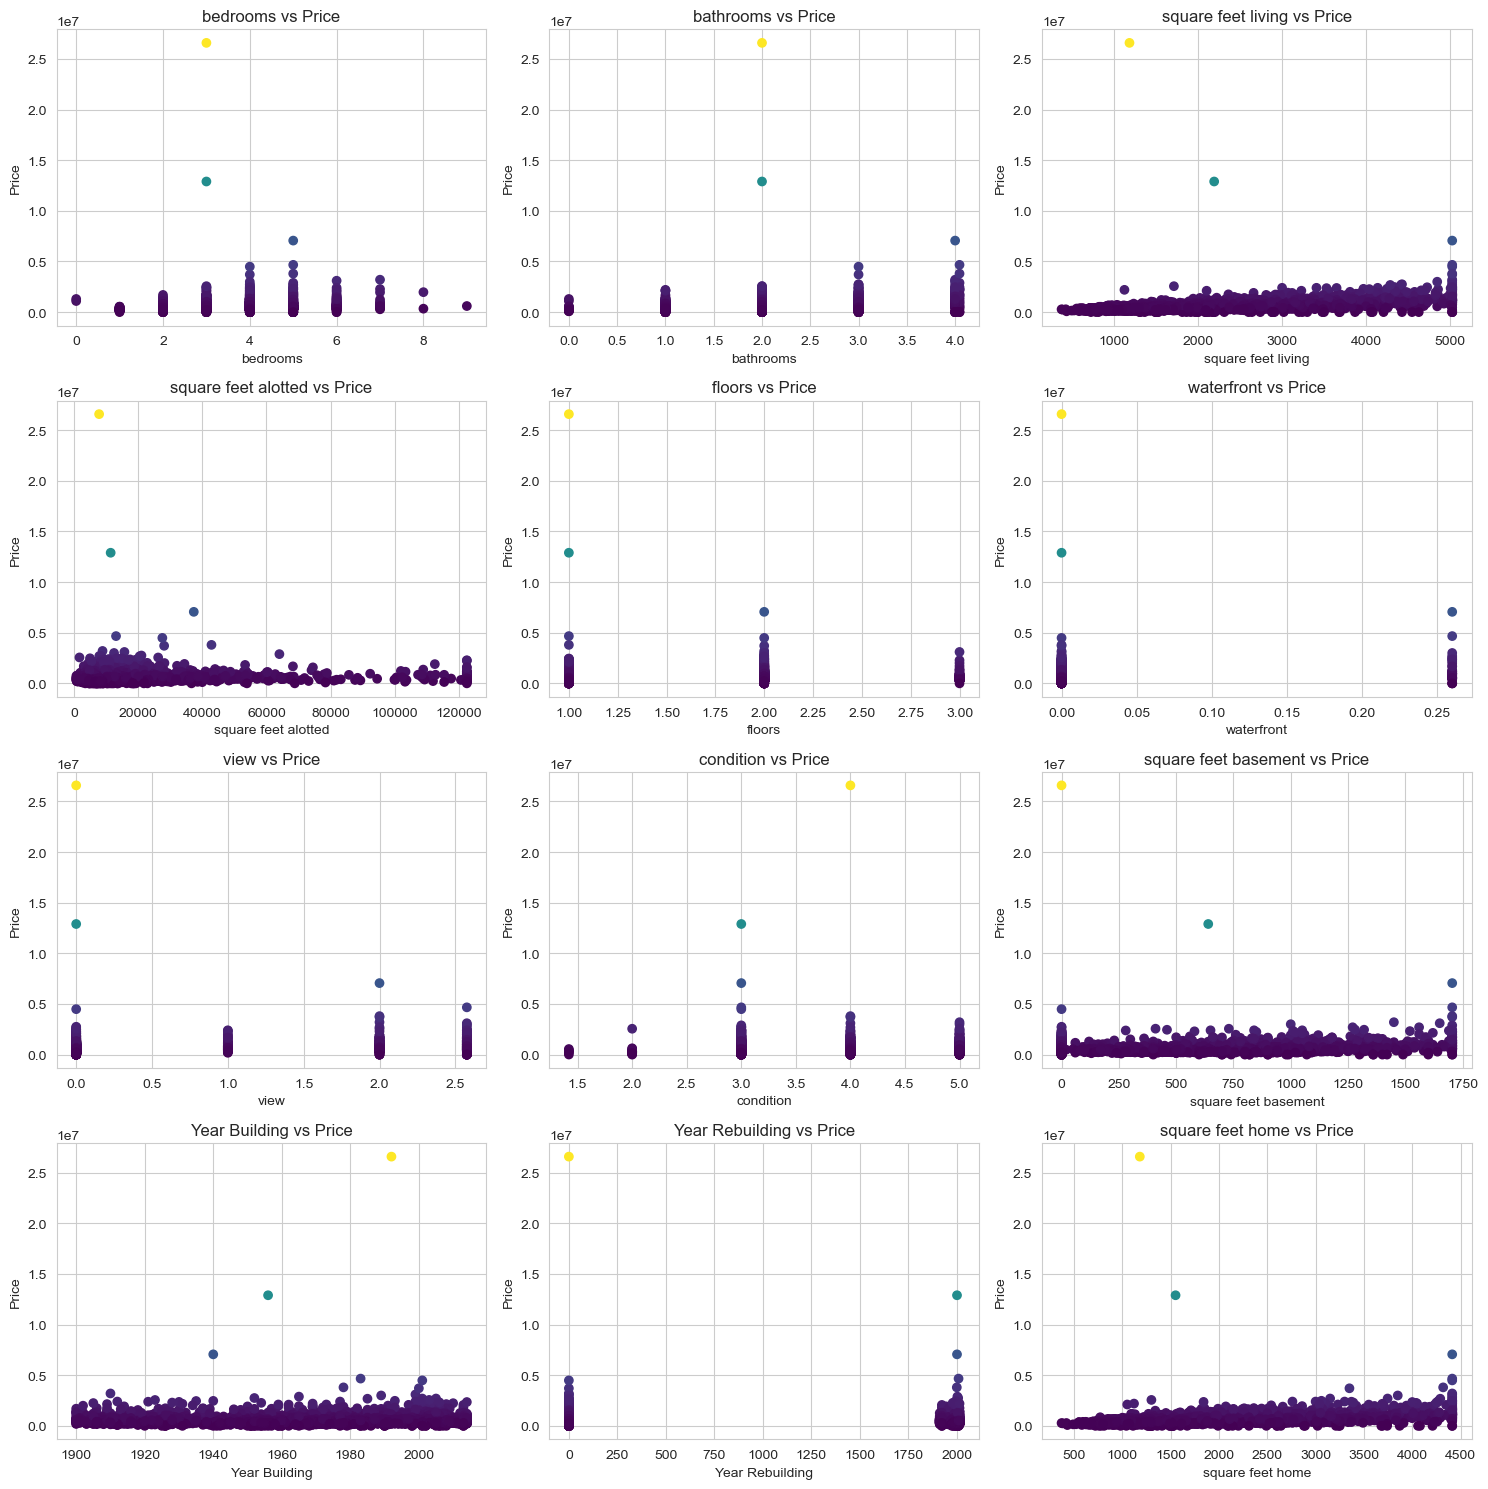

In [47]:
name_feature =['bedrooms'
               , 'bathrooms'
               , 'square feet living'
               , 'square feet alotted'
               , 'floors'
               ,'waterfront', 'view'
               , 'condition'
               ,'square feet basement'
               ,'Year Building'
               ,'Year Rebuilding' 
               ,'square feet home']

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i, column in enumerate(name_feature):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(df[column], df["price"], c=df["price"], cmap="viridis")
    axs[row, col].set_title(column + " vs Price")
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel("Price")

plt.tight_layout()
plt.show()